### Example

In [70]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', '../src/weights/detect/yolov5s_best.pt')

Using cache found in /home/mlandrey/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-27 Python-3.8.10 torch-1.12.1+cu102 CPU

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [48]:
img = '../data/69.jpg'
results = model(img)

In [8]:
len(results.pandas().xyxy)

1

In [9]:
from PIL import Image, ImageDraw

In [62]:
image = Image.open(img)
results = model(img)

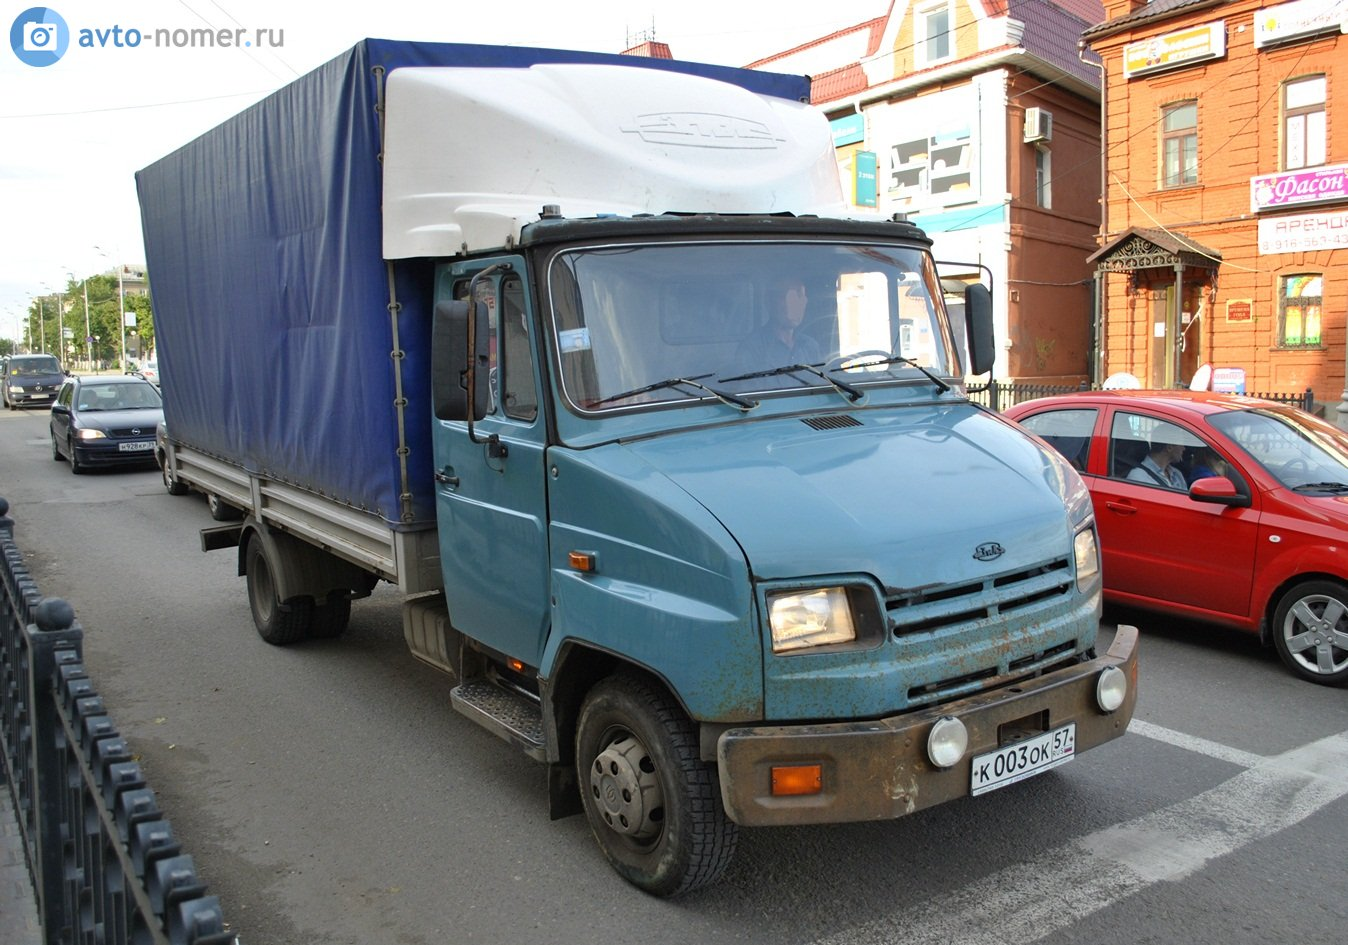

In [63]:
image

In [64]:
xmin = results.pandas().xyxy[0]['xmin'].iloc[0] 
ymin = results.pandas().xyxy[0]['ymin'].iloc[0]
xmax = results.pandas().xyxy[0]['xmax'].iloc[0] 
ymax = results.pandas().xyxy[0]['ymax'].iloc[0] 

In [65]:
draw = ImageDraw.Draw(image) 
draw.line((xmin, ymin, xmax, ymin), fill=128, width=4)
draw.line((xmax, ymin, xmax, ymax), fill=128, width=4)
draw.line((xmax, ymax, xmin, ymax), fill=128, width=4)
draw.line((xmin, ymax, xmin, ymin), fill=128, width=4)
image.show()

In [66]:
from PIL import ImageFont
myFont = ImageFont.truetype('FreeMono.ttf', 30)
draw.text((xmin, ymax), "Sample Text", fill=(255, 128, 0), font=myFont)
image.show()

In [27]:
image_crop = image.crop((xmin, ymin, xmax, ymax))
image_crop.show()

### Run

In [10]:
import os
import torch
from tqdm import tqdm

class YoloInference:

    def __init__(self, path_to_weight: str = './yolov5/runs/train/exp4/weights/best.pt'):
        self.model = torch.hub.load('ultralytics/yolov5', 'custom', path_to_weight)
    
    def __call__(self, img):
        results = self.model(img)

        return results

In [11]:
model = YoloInference()

Using cache found in C:\Users\endru/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-26 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [12]:
img_paths = os.listdir('./data/images/test/')[:100]
img_paths

['10004.jpg',
 '10018.jpg',
 '10022.bmp',
 '10030.bmp',
 '10031.jpg',
 '10036.jpg',
 '10044.jpg',
 '10047.jpg',
 '10078.bmp',
 '1008.bmp',
 '10091.bmp',
 '10094.jpg',
 '10096.jpg',
 '10105.bmp',
 '10106.bmp',
 '10118.jpg',
 '1012.jpg',
 '10124.jpg',
 '1014.jpg',
 '10150.jpg',
 '10162.jpg',
 '10192.bmp',
 '1020.bmp',
 '10215.jpg',
 '10224.jpg',
 '10225.jpg',
 '10230.jpg',
 '10245.bmp',
 '10269.jpg',
 '10278.jpg',
 '10283.bmp',
 '10285.bmp',
 '10286.jpg',
 '10310.jpg',
 '10322.jpg',
 '10340.jpg',
 '10341.jpg',
 '10342.jpg',
 '10399.jpg',
 '104.bmp',
 '10405.jpg',
 '10413.jpg',
 '1043.jpg',
 '10431.jpg',
 '10432.jpg',
 '10453.bmp',
 '10499.bmp',
 '10505.jpg',
 '1051.jpg',
 '1052.jpg',
 '10540.jpg',
 '10544.jpg',
 '10551.bmp',
 '10555.jpg',
 '10556.jpg',
 '10565.bmp',
 '10573.jpg',
 '10592.bmp',
 '10608.bmp',
 '10609.bmp',
 '10610.jpg',
 '10614.jpg',
 '10618.bmp',
 '10627.jpg',
 '10639.jpg',
 '10643.jpg',
 '10673.jpg',
 '1068.jpg',
 '10688.bmp',
 '10698.jpg',
 '10728.jpg',
 '10743.jpg',
 '

In [33]:
for path in tqdm(img_paths):
    image = Image.open(os.path.join('./data/images/test/', path))
    
    results = model(image)
    if len(results.pandas().xyxy) > 0:
        xmin = results.pandas().xyxy[0]['xmin'].iloc[0]
        ymin = results.pandas().xyxy[0]['ymin'].iloc[0] 
        xmax = results.pandas().xyxy[0]['xmax'].iloc[0] 
        ymax = results.pandas().xyxy[0]['ymax'].iloc[0] 
        
        try:
            draw = ImageDraw.Draw(image) 
            draw.line((xmin, ymin, xmax, ymin), fill=128, width=4)
            draw.line((xmax, ymin, xmax, ymax), fill=128, width=4)
            draw.line((xmax, ymax, xmin, ymax), fill=128, width=4)
            draw.line((xmin, ymax, xmin, ymin), fill=128, width=4)
            image.save(f'./data/example_res_detect/{path}')
        except Exception as e:
            print('Exception')
            print(os.path.join('./data/images/test/', path))
    else:
        print(os.path.join('./data/images/test/', path))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.80it/s]
